In [1]:
import cv2
import numpy as np
import requests
from PIL import Image

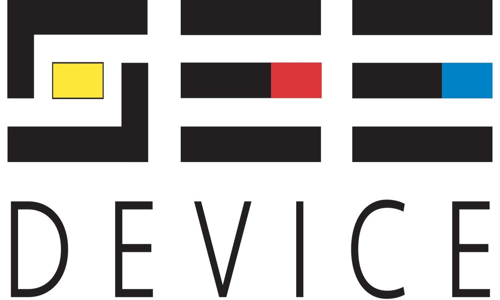

In [2]:
# Reading image form url
image = Image.open(requests.get('https://mma.prnewswire.com/media/1231190/See_Devices_Logo.jpg?p=facebook', stream=True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

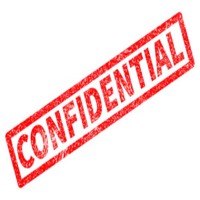

In [3]:
# Reading logo form url
logo = Image.open(requests.get('https://ercare24.com/wp-content/uploads/confidential-hiv-testing.jpg', stream=True).raw)
logo = logo.resize((200,200))
logo

In [4]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

In [5]:
# Get the center of the original. It's the location where we will place the watermark
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

In [6]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 1, logo, 10, 0)
# Drawing
#cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
#cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

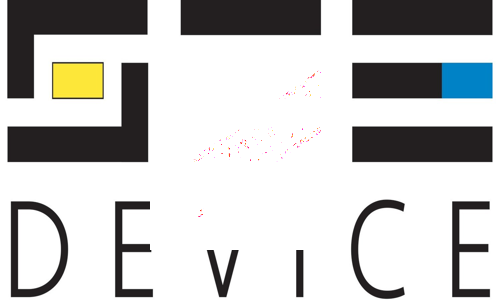

In [7]:
# Ploting logo watermark image
img = Image.fromarray(image_logow, 'RGB')
img

In [8]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='seedevice', org=(w_image - 95, h_image - 120), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(0,0,255), thickness=2, lineType=cv2.LINE_4); 

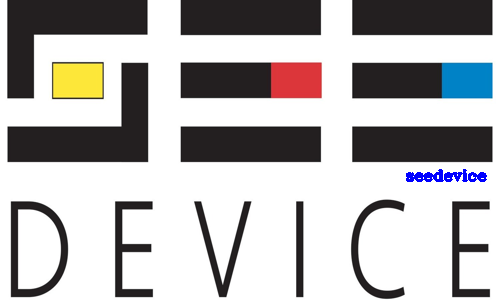

In [9]:
# Plotting text watermark image
timg = Image.fromarray(image_text, 'RGB')
timg